# General information

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [695]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


stud = pd.read_csv('stud_math.xls')

In [611]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 1. Первичная обработка данных

## 1.1 Missing values

In [612]:
print(f'There are {stud.isnull().any().sum()} columns in train dataset with missing values.')

There are 27 columns in train dataset with missing values.


In [613]:
na_values = stud.isna()
sum_na = na_values.sum()
print('Percentage share of missing values across columns:')
sum_na / len(stud)

Percentage share of missing values across columns:


school                 0.000000
sex                    0.000000
age                    0.000000
address                0.043038
famsize                0.068354
Pstatus                0.113924
Medu                   0.007595
Fedu                   0.060759
Mjob                   0.048101
Fjob                   0.091139
reason                 0.043038
guardian               0.078481
traveltime             0.070886
studytime              0.017722
failures               0.055696
schoolsup              0.022785
famsup                 0.098734
paid                   0.101266
activities             0.035443
nursery                0.040506
studytime, granular    0.017722
higher                 0.050633
internet               0.086076
romantic               0.078481
famrel                 0.068354
freetime               0.027848
goout                  0.020253
health                 0.037975
absences               0.030380
score                  0.015190
dtype: float64

**Вывод**: в датасете есть две переменные, в столбцах которых есть > 10% missing values: "Pstatus", "paid".

In [636]:
stud.sex = stud.sex.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.address = stud.address.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.famsize = stud.famsize.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.Pstatus = stud.Pstatus.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.Mjob = stud.Mjob.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.Fjob = stud.Fjob.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.guardian = stud.guardian.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.internet = stud.internet.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.reason = stud.reason.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.nursery = stud.nursery.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.schoolsup = stud.schoolsup.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.famsup = stud.famsup.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.paid = stud.paid.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.higher = stud.higher.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.activities = stud.activities.apply(lambda x: 'NA' if pd.isnull(x) else x)
stud.romantic = stud.romantic.apply(lambda x: 'NA' if pd.isnull(x) else x)


stud.Medu = stud.Medu.apply(lambda x: None if x == '' else x)
stud.Fedu = stud.Fedu.apply(lambda x: None if x == '' else x)
stud.traveltime = stud.traveltime.apply(lambda x: None if x == '' else x)
stud.studytime = stud.studytime.apply(lambda x: None if x == '' else x)
stud.freetime = stud.freetime.apply(lambda x: None if x == '' else x)
stud.goout = stud.goout.apply(lambda x: None if x == '' else x)
stud.failures = stud.failures.apply(lambda x: None if x == '' else x)
stud.famrel = stud.famrel.apply(lambda x: None if x == '' else x)
stud.health = stud.health.apply(lambda x: None if x == '' else x)

In [614]:
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## 1.2 New variables

**NOTE**: при рассмотре переменных в датасете была обнаружена новая переменная "studytime, granular", не указанная в описании датасета. Проверим можно ли использовать эту переменную, т.к. в сэмпле она принимает минусовые значения. 
Гипотеза: нам нужно просто преобразовать значения в положительные.
Для начала переименуем переменную "studytime, granular" в "studytime_hr" и преобразуем в положительные значения:

In [697]:
stud = stud.rename(columns = {'studytime, granular':'studytime_gr'})
stud.studytime_gr = stud.studytime_gr.apply(lambda x: None if x == '' else x*(-1))

In [698]:
studytime_test = stud[['studytime', 'studytime_gr']]
studytime_test.corr()

,studytime,studytime_gr
studytime,1.0,1.0
studytime_gr,1.0,1.0


Мы видим что между этими переменными есть корреляция.
Согласно описанию датасета между переменными studytime и studytime, granular существует следующее отношение:
* 1 - <2 часов, 
* 2 - 2-5 часов, 
* 3 - 5-10 часов, 
* 4 - >10 часов

Проверим, следует ли переменная этим значениям:

Text(0.5, 0, 'studytime')

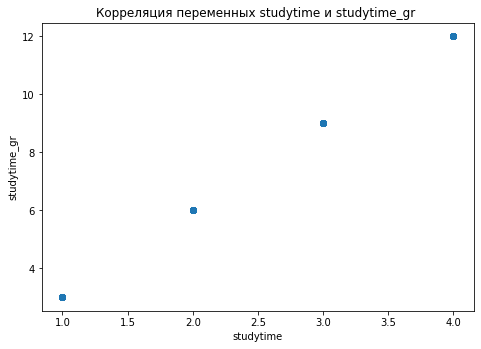

In [699]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud['studytime'], y = stud['studytime_gr'], marker = 'o')
axes.set_title('Корреляция переменных studytime и studytime_gr ')
axes.set_ylabel('studytime_gr')
axes.set_xlabel('studytime')

**Вывод**: переменная studytime_gr при значении 6 принимает значение studytime = 2, что не следует логике датасета (2 : 2-5 часов), поэтому эта переменная не описывает часы, а вероятно какой-то другой показатель. Переменная принимает только 4 значения и не добавляет информации о времени учебы, поэтому мы не будем ее включать в наше EDA. 

In [700]:
stud.drop(['studytime_gr'], inplace = True, axis = 1)

## 2 Numeric Variables


Числовые переменные:

 - score
 - age
 - absences
 
Рассмотрим подробнее числовые переменные и определим выбросы.

### 2.1 score

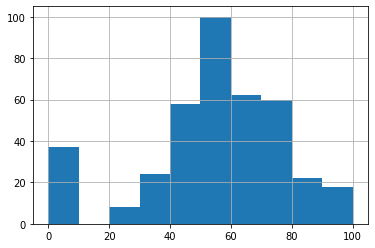

In [619]:
stud.score.hist()

In [620]:
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [621]:
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

**Note:** нулевое значение возможно означает что ученик не писал этот экзамен, поэтому этот результат исказит нашу модель. Исключим эти данные из выборки:

In [701]:
stud = stud.loc[stud.score > 0]

### 2.2 age

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

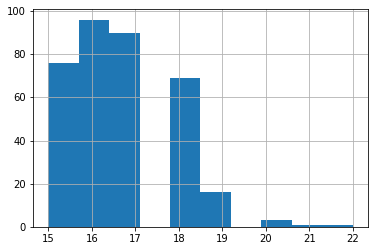

In [623]:
stud.age.hist()
stud.age.describe()

**Note**: посмотрим на взаимосвязь между score и age:

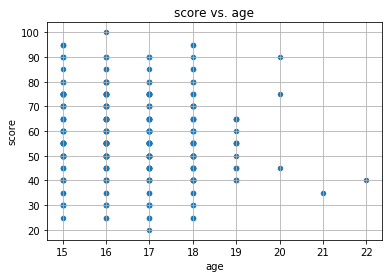

In [624]:
stud.plot(x = 'age', 
        y = 'score', 
        kind = 'scatter', 
        grid = True,
        title = 'score vs. age')

**Вывод**: несмотря на то что значения переменной age находятся в допустимых значениях (15-22), два ученика старже 20 могут исказить нашу модель, поэтому уберем данные, где ученик был старше 19-ти лет.

In [702]:
stud = stud.loc[stud.age < 20]

### 2.3. absences

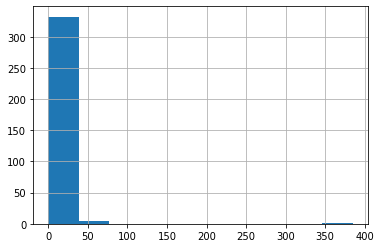

In [626]:
stud.absences.hist()

In [627]:
stud.absences.describe()

count    337.000000
mean       7.513353
std       22.244327
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

**Note**: значения переменной absences содержат выбросы. Определим сферу допустимых значений с помощью формулы интерквартильного расстояния.

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


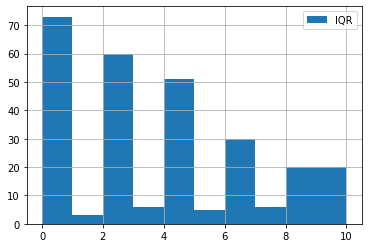

In [628]:
absences_median = stud.absences.median()
absences_IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
absences_perc25 = stud.absences.quantile(0.25)
absences_perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(absences_perc25), '75-й перцентиль: {},'.format(absences_perc75)
      , "IQR: {}, ".format(absences_IQR),"Границы выбросов: [{f}, {l}].".format(f=absences_perc25 - 1.5*absences_IQR, l=absences_perc75 + 1.5*absences_IQR))
stud.absences.loc[stud.absences.between(absences_perc25 - 1.5*absences_IQR, absences_perc75 + 1.5*absences_IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

**Note**: метод интерквартильного расстояния предлагает нам определить 17 как верхнюю границу допустимых значений для параметра absences. В среднем в учебном году 34-37 недель, если учесть что в некоторых школах занятия математикой проходят дважды в неделю, допустимое максимальное значение пропусков = 37*2=74. Если посмотреть на распределение этого параметра по значениям больше 20-ти, кажется что большинство значений выглядит реалистично, кроме двух (385 и 212), поэтому мы не будем следовать интерквартильному методу, а только уберем значения < 74:

In [629]:
stud.absences.value_counts()

0.0      73
2.0      60
4.0      51
6.0      30
8.0      20
10.0     17
14.0     12
12.0     12
3.0       6
7.0       6
16.0      6
18.0      5
5.0       5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
17.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
28.0      1
Name: absences, dtype: int64

In [630]:
stud = stud.loc[stud.absences < 74]

**Note**: посмотрим на взаимосвязь между параметрами score и absences:

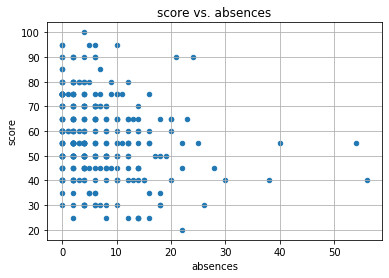

In [631]:
stud.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True,
        title = 'score vs. absences')

**Вывод**: выбросы где количество пропусков больше 30-ти могут исказить нашу модель, поэтому исключим данные, где absences >30:

In [703]:
stud = stud.loc[stud.absences <= 30]

## 3. Nominate Variables

Категориальные переменные:





Мы рассмотрим категориальные переменные только на предмет того следуют ли они значениям приведенным в описании датасета, или в них есть какие-то нерелевантные значения.

Разобьем эти переменные на группы по значениям, которые они могут принимать. 
Сначала рассмотрим отдельно переменную school, т.к. для нее не определен диапазон значений.

### 3.1 school

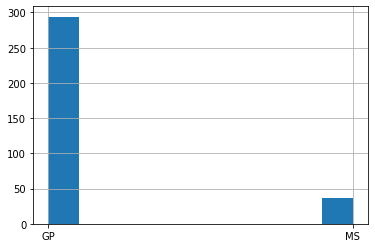

In [634]:
stud.school.hist()

**Вывод**: мы видим что school принимает только два значения: GP и MS, при том что большинство учеников все же числятся в первой школе. Не смотря на то что наша модель по сути тогда будет описывать только одну школу, не будем убирать данные школы MS, так как будет интересно рассмотреть насколько успеваемость коррелирует со школой.

### 3.2 sex, address, famsize, Pstatus, guardian

Рассмотрим одной группой четыре показателя, которые описывают общую демографическую ситуацию ученика.

- sex — пол ученика ('F' - женский, 'M' - мужской)
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- nursery — посещал детский сад (yes или no)

Text(0.5, 1.0, 'nursery')

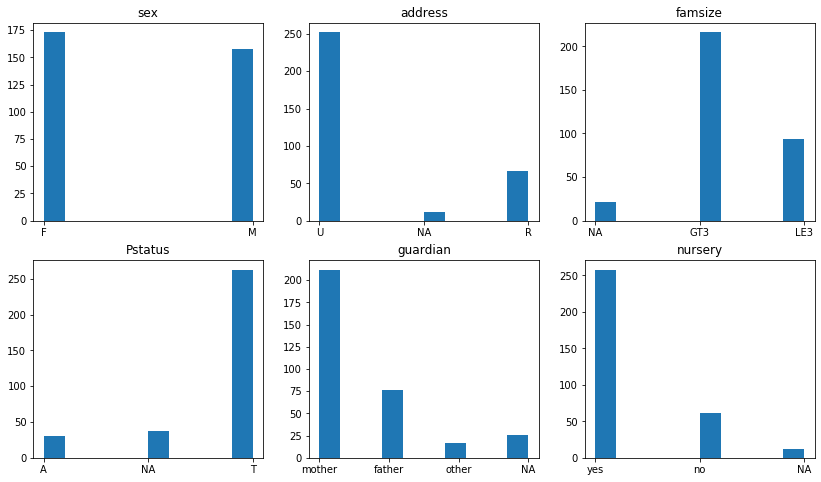

In [637]:
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes[0,0].hist(stud['sex'])
axes[0,0].set_title('sex')

axes[0,1].hist(stud['address'])
axes[0,1].set_title('address')

axes[0,2].hist(stud['famsize'])
axes[0,2].set_title('famsize')

axes[1,0].hist(stud['Pstatus'])
axes[1,0].set_title('Pstatus')

axes[1,1].hist(stud['guardian'])
axes[1,1].set_title('guardian')

axes[1,2].hist(stud['nursery'])
axes[1,2].set_title('nursery')

**Вывод**: все шесть рассмотренных переменных принимают допустимые значения. В нашей выборке немного больше учеников женского пола, чем мужского. Большинство живут в городе, у большинства в семье больше 3-х человек и у подавляющего большинства родители живут вместе. Для большинства учеников главные опекун - мать. Большинство учеников ходили в детский сад. Эти демографические параметры описывают общую обстановку в семье и будет интересно рассмотреть есть ли взаимосвязь между ними и успеваемостью ученика.

### 3.3 Medu, Fedu, Mjob, Fjob

Теперь рассмотрим показатели, которые характеризуют образование и занятость родителей.

- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Fjob')

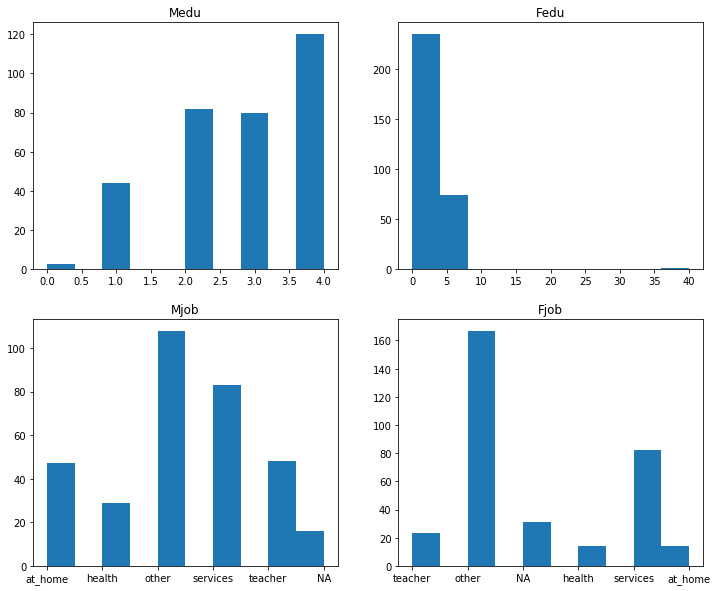

In [638]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes[0,0].hist(stud['Medu'])
axes[0,0].set_title('Medu')

axes[0,1].hist(stud['Fedu'])
axes[0,1].set_title('Fedu')

axes[1,0].hist(stud['Mjob'])
axes[1,0].set_title('Mjob')

axes[1,1].hist(stud['Fjob'])
axes[1,1].set_title('Fjob')

**Note**: судя по распределению параметра Fedu в нем присутствуют выбросы

In [639]:
stud['Fedu'].describe()

count    310.000000
mean       2.654839
std        2.386632
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [640]:
stud.Fedu.value_counts()

2.0     88
3.0     83
4.0     74
1.0     62
0.0      2
40.0     1
Name: Fedu, dtype: int64

**Note:** мы исключим Fedu = '40' из выборки, т.к. это очевидный выброс.

In [704]:
stud = stud.loc[stud.Fedu <= 4]

**Вывод**: показатели образования между матерями и отцами отличаются не очень сильно, из тенденций - матери более вероятно имеют высшее образование, а отцы - 5-9 классов. Про работу большинства матерей и отцов нам не известно, т.к. параметры Mjob, Fjob принимают значение Other. Для матерей топ три специальности это sevices, at home, teacher. Большинство отцов о которых есть данные про работу, работают в сфере услуг. Эти параметры описывают образование и работу родителей ученика, и будет интересно рассмотреть есть ли взаимосвязь между уровнем образования родителей и их специальностью и успеваемостью ученика.

### 3.4 traveltime, reason, studytime

Теперь рассмотрим параметры, которые характеризуют общий образовательный процесс для ученика.

- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Text(0.5, 1.0, 'reason')

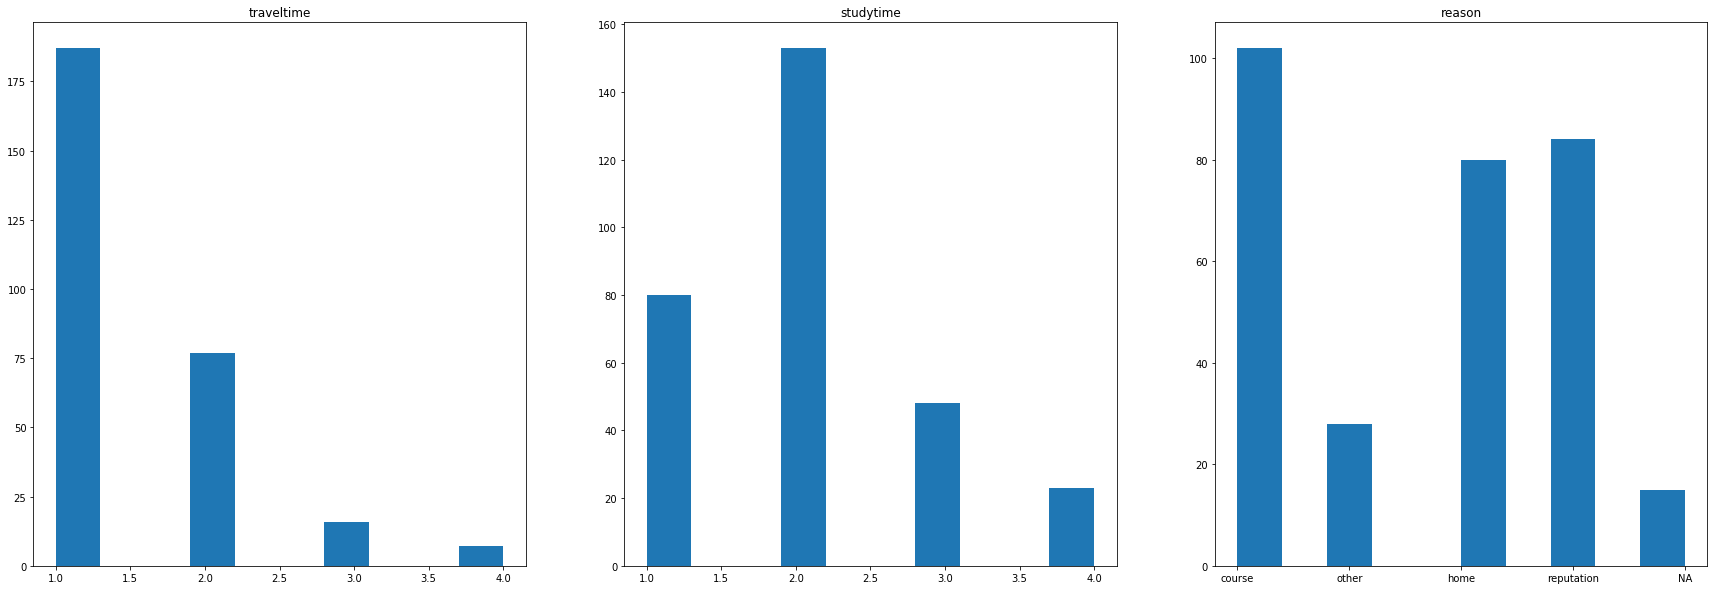

In [642]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))
axes[0].hist(stud['traveltime'])
axes[0].set_title('traveltime')

axes[1].hist(stud['studytime'])
axes[1].set_title('studytime')

axes[2].hist(stud['reason'])
axes[2].set_title('reason')

**Вывод**: все параметры принимают допустимые значения. Как мы видим из распределения, большинство учеников тратят меньше 15 минут для дороги в школу, занимаются в среднем 2-5 часа помимо школы. Для большинства причина выбора школы была образовательная программа, затем близость к дому и репутация. Поскольку reason это субъективный параметр, который указывает либо ученик либо родители, возможно в нем содержится уклон на рационализацию поведения, потому что как мы видим из параметра traveltime большинство учеников тратят на дорогу меньше 15 минут, что значит что это все равно скорее всего ближайшая школа. Рассмотрим этот параметр подробнее когда будем строить корреляцию.

### 3.5 internet, schoolsup, famsup, paid, higher

Теперь рассмотрим параметры, которые характеризуют насколько ученик и его семья прилагают дополнительные усилия для успеха на экзамене по математике.

- internet — наличие интернета дома (yes или no)
- schoolsup — дополнительная образовательная поддержка (yes или no)
- famsup — семейная образовательная поддержка (yes или no)
- paid — дополнительные платные занятия по математике (yes или no)
- higher — хочет получить высшее образование (yes или no)

Text(0.5, 1.0, 'higher')

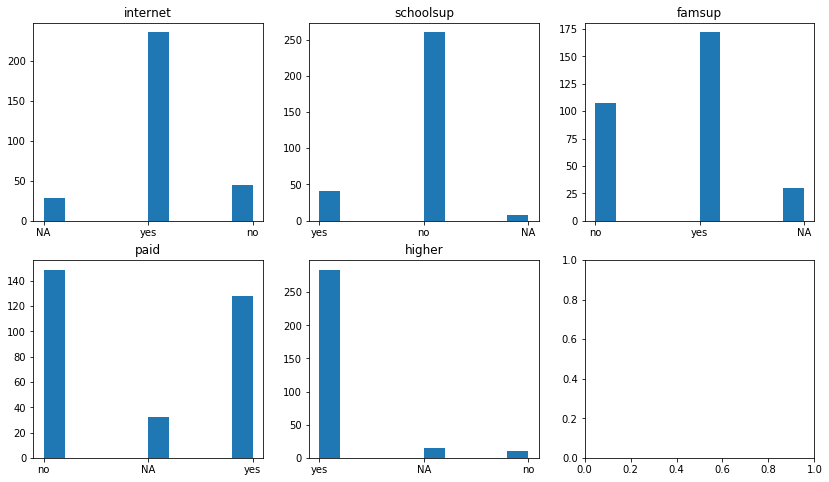

In [643]:
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes[0,0].hist(stud['internet'])
axes[0,0].set_title('internet')

axes[0,1].hist(stud['schoolsup'])
axes[0,1].set_title('schoolsup')

axes[0,2].hist(stud['famsup'])
axes[0,2].set_title('famsup')


axes[1,0].hist(stud['paid'])
axes[1,0].set_title('paid')

axes[1,1].hist(stud['higher'])
axes[1,1].set_title('higher')

**Note:** интересно рассмотреть есть ли корреляция между параметрами schoolsup, famsup, paid:

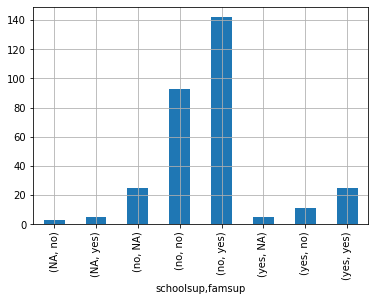

In [644]:
support = stud[['schoolsup', 'famsup', 'paid']]
support.groupby(by = ['schoolsup', 'famsup'])['paid'].count().plot(kind = 'bar', grid= True)

**Вывод**: значения переменных находятся в допустимых значениях. У большинства учеников есть интернет. Большинство учеников не получает дополнительную образовательную поддержку, но получают либо семейную помощь либо посещают платные дополнительные занятия по математике. Подавлюящее большинство учеников хочет получить высшее образование. 

### 3.6 failures, romantic, activities, freetime, goout, famrel, health

В этой категории рассмотрим параметры которые описывают жизнь ученика вне учебы. 

- failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- romantic — в романтических отношениях (yes или no)
- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- activities — дополнительные внеучебные занятия (yes или no)

Text(0.5, 1.0, 'activities')

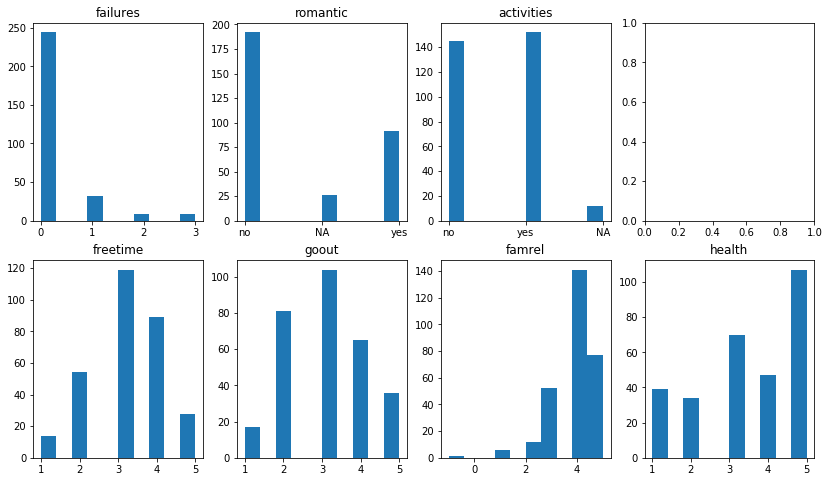

In [645]:
fig, axes = plt.subplots(2, 4, figsize=(14,8))
axes[0,0].hist(stud['failures'])
axes[0,0].set_title('failures')

axes[0,1].hist(stud['romantic'])
axes[0,1].set_title('romantic')

axes[1,0].hist(stud['freetime'])
axes[1,0].set_title('freetime')

axes[1,1].hist(stud['goout'])
axes[1,1].set_title('goout')

axes[1,2].hist(stud['famrel'])
axes[1,2].set_title('famrel')

axes[1,3].hist(stud['health'])
axes[1,3].set_title('health')

axes[0,2].hist(stud['activities'])
axes[0,2].set_title('activities')

**Note:** в переменной famrel есть недопустимые значение (<0). Удалим их:

In [646]:
stud.famrel.value_counts()

 4.0    141
 5.0     77
 3.0     52
 2.0     12
 1.0      6
-1.0      1
Name: famrel, dtype: int64

In [705]:
stud = stud.loc[stud.famrel > 0]

**Вывод**:все переменные принимают допустимые значения, кроме переменной famrel. Из того как можно трактовать переменную failures, получается что большинство либо не имеют неудач, либо имеют больше трех. В дальнейшем предположим что количество учеников с > 3  failures мало (основываясь на данных для 2 и 3), поэтому будем предполагать, что большинство кто находится в категории "0" не имеют неудач. 

Большинство учеников не состоят в отношениях. Половина учеников посещают дополнительные внеучебные занятия, половина нет.


Что касается параметров freetime, goout, famrel и health  - из датасета неясно как были собраны эти данные. Скорее всего т.к. значения представлены на шкале, это субъективная оценка ученика и отражает не реально проведенное время, а его отношение насколько ему достаточно этого времени. Для модели будет интересно рассмотреть есть ли зависимость между этими переменными, описывающими скорее субъективную оценку своего состояния и отношений и результатами экзамена.

# 4. Correlation numeric variables

Выясним, какие столбцы коррелируют с оценкой на экзамене чтобы определить какие параметры стоит оставить для модели.

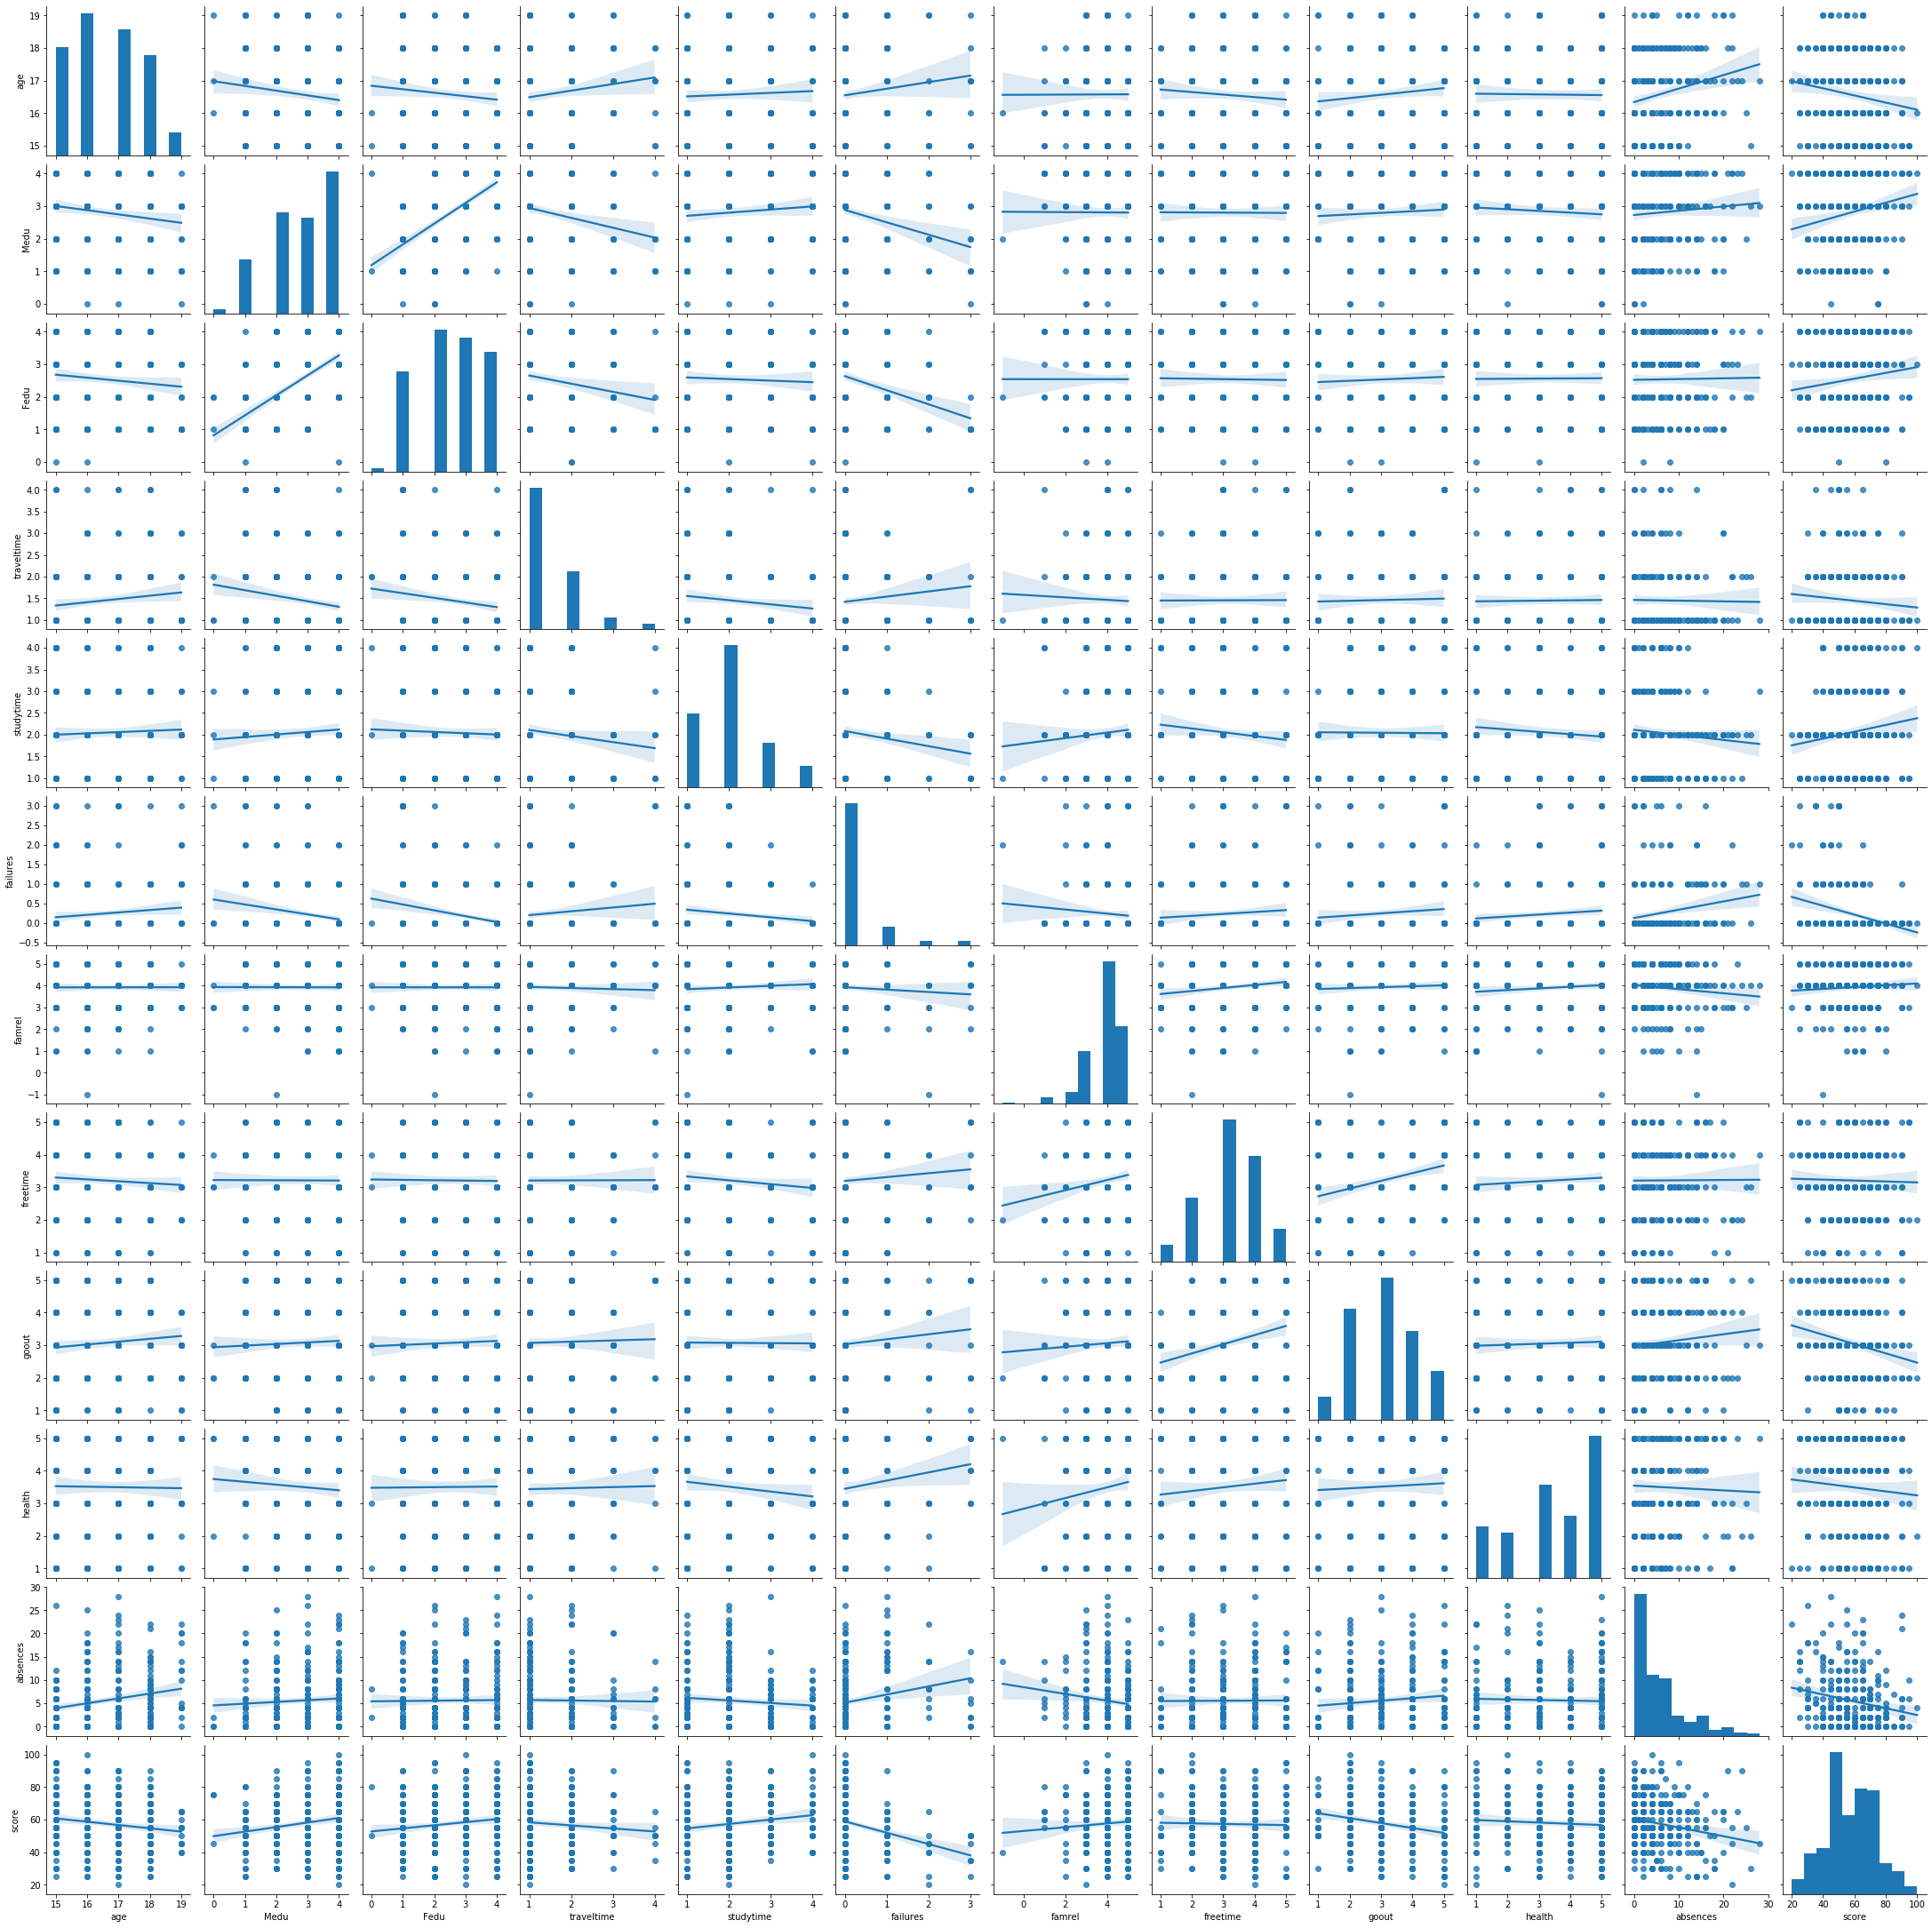

In [503]:
sns.pairplot(stud, kind = 'reg')

In [648]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.131801,-0.107050,0.109557,0.019852,0.119611,-0.007245,-0.080103,0.058011,-0.032261,0.193882,-0.131068
Medu,-0.131801,1.000000,0.637855,-0.182268,0.071091,-0.196014,-0.017942,-0.008712,0.071311,-0.085107,0.118579,0.172900
Fedu,-0.107050,0.637855,1.000000,-0.191122,-0.031253,-0.250231,-0.009990,-0.009304,0.030973,-0.008258,0.027385,0.131801
traveltime,0.109557,-0.182268,-0.191122,1.000000,-0.131557,0.117873,-0.053163,0.019930,0.014615,0.010768,-0.030706,-0.092659
studytime,0.019852,0.071091,-0.031253,-0.131557,1.000000,-0.123750,0.050279,-0.107279,-0.034256,-0.111230,-0.079758,0.143225
failures,0.119611,-0.196014,-0.250231,0.117873,-0.123750,1.000000,-0.024435,0.106210,0.093929,0.098751,0.165997,-0.255930
famrel,-0.007245,-0.017942,-0.009990,-0.053163,0.050279,-0.024435,1.000000,0.132233,0.032431,0.139469,-0.096131,0.051695
freetime,-0.080103,-0.008712,-0.009304,0.019930,-0.107279,0.106210,0.132233,1.000000,0.270266,0.108814,0.022791,-0.020310
goout,0.058011,0.071311,0.030973,0.014615,-0.034256,0.093929,0.032431,0.270266,1.000000,0.005451,0.085139,-0.179015
health,-0.032261,-0.085107,-0.008258,0.010768,-0.111230,0.098751,0.139469,0.108814,0.005451,1.000000,-0.034653,-0.055765


**Вывод:** среди числовых параметров не обнаружено тех, которые бы сильно коррелировали между собой (мы исключили переменную studytime granular на прошлых шагах). Интересно что наибольшая корреляция наблюдается между переменными образования родителей Fedu, Medu - но мы не будем исключать одну из них из датасета.

На какие переменные мы смотрим (количественные):
 - absences
 - score
 - age

Согласно коэффициентам корреляции, итоговый score на экзамене больше всего зависит от следующих параметров:
* absences - чем больше ученик пропустил уроков, тем ниже оценка
* age - чем меньше возраст ученика, тем выше оценка (гипотеза: чем старше группа обучения, тем более вероятность повторения экзамена,если этот один и тот же экзамен, и более сильное отличие между учебными программами, по сравнению с младшими классами, если это разные экзамены)


# 5. Correlation nominate variables


Проанализируем номинативные переменные и устраним те, которые не влияют на предсказываемую величину score.
Будем работать с теми же группами, которые мы выделили на предыдущем шаге.

In [649]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 5))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [706]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## 5.1 school

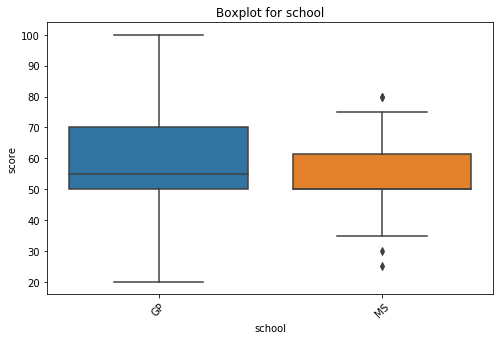

In [651]:
for col in ['school']:
    get_boxplot(col)

Проверим, есть ли статистическая зависимость с помощью теста Стьюдента:

In [707]:
for col in ['school']:
    get_stat_dif(col)

## 5.2 sex, address, famsize, Pstatus, guardian

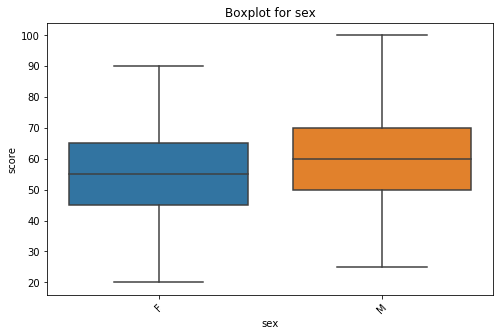

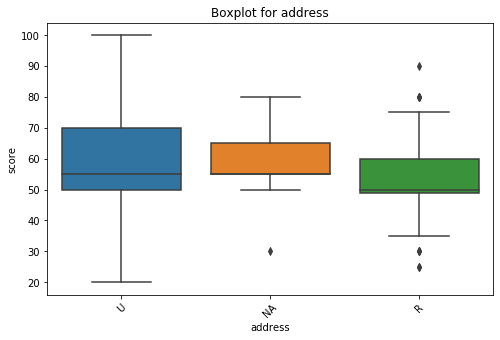

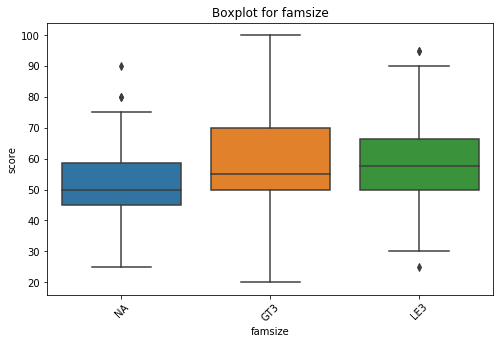

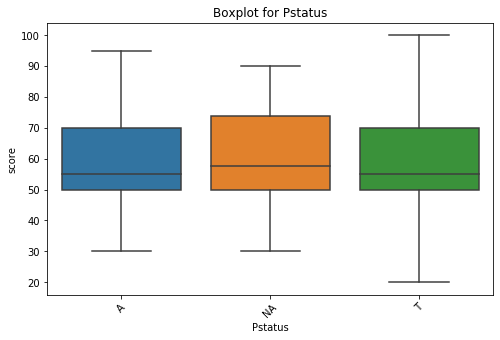

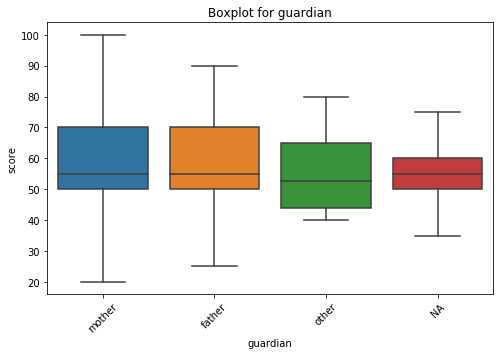

In [653]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'guardian']:
    get_boxplot(col)

Проверим, есть ли статистическая зависимость с помощью теста Стьюдента:

In [708]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address


## 5.3 Medu, Fedu, Mjob, Fjob

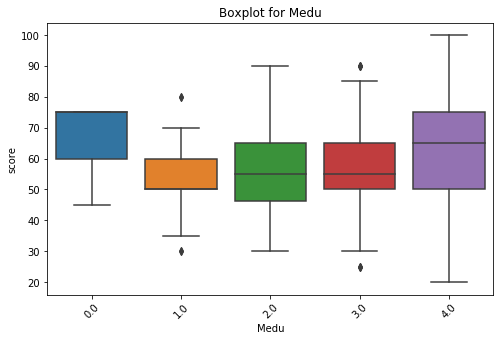

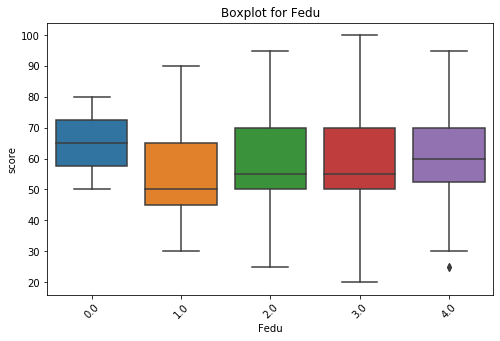

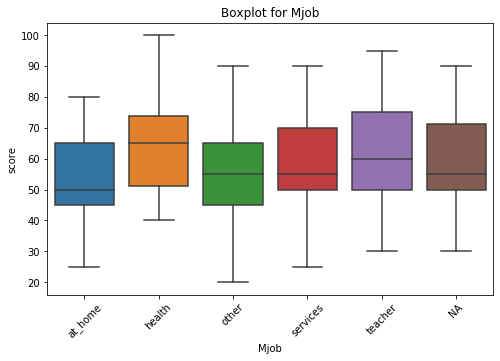

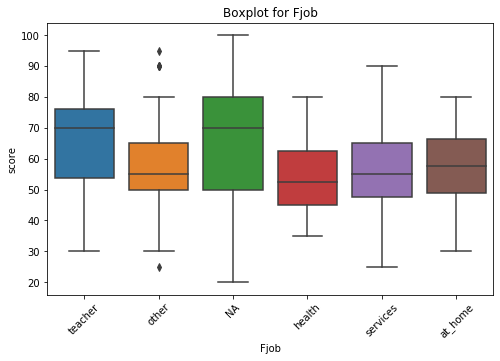

In [656]:
for col in ['Medu', 'Fedu', 'Mjob', 'Fjob']:
    get_boxplot(col)

Проверим, есть ли статистическая зависимость с помощью теста Стьюдента:

In [709]:
for col in ['Medu', 'Fedu', 'Mjob', 'Fjob']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


## 5.4  traveltime, reason, studytime

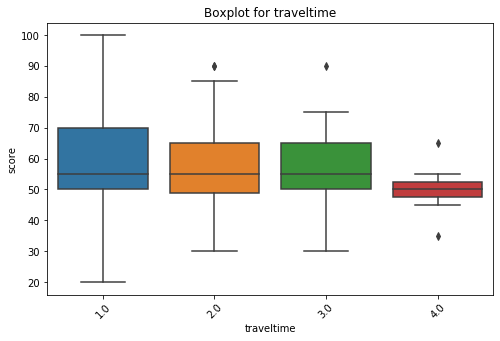

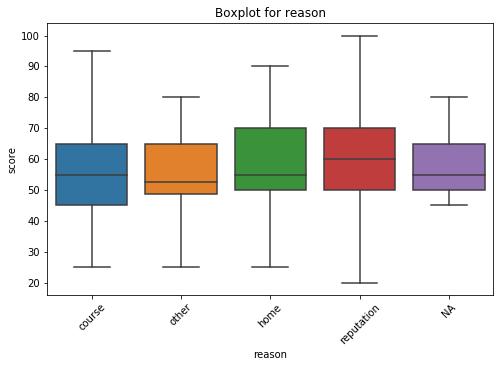

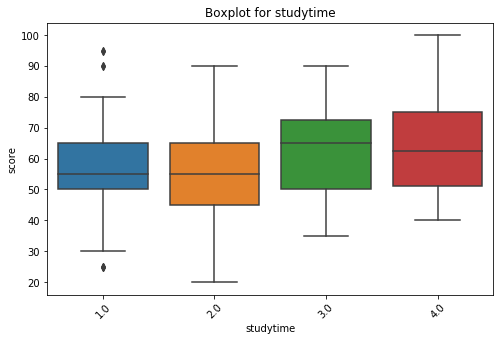

In [658]:
for col in ['traveltime', 'reason', 'studytime']:
    get_boxplot(col)

Проверим, есть ли статистическая зависимость с помощью теста Стьюдента:

In [710]:
for col in ['traveltime', 'reason', 'studytime']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки studytime


## 5.5 internet, schoolsup, famsup, paid, higher

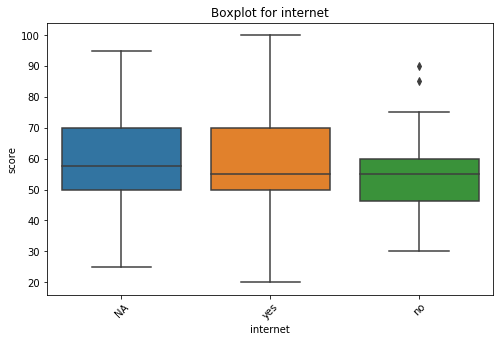

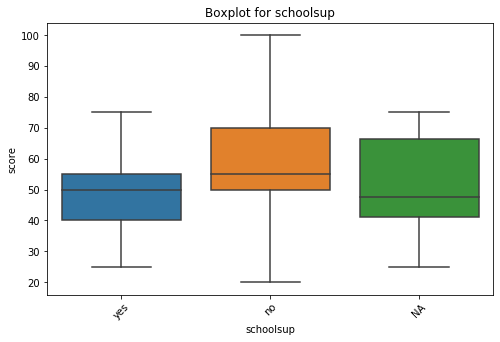

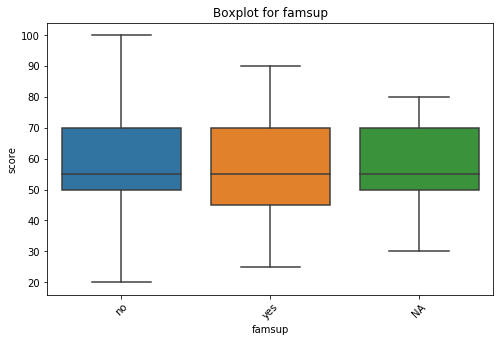

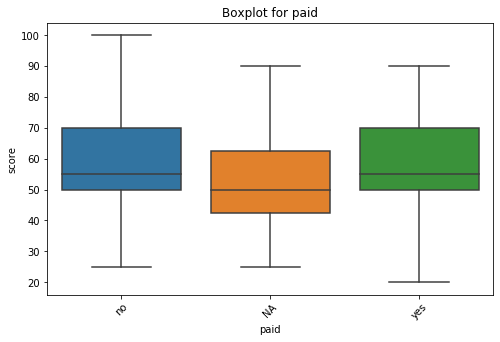

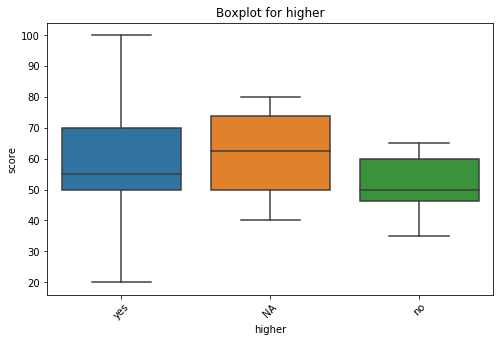

In [660]:
for col in ['internet', 'schoolsup', 'famsup', 'paid', 'higher']:
    get_boxplot(col)

Проверим, есть ли статистическая зависимость с помощью теста Стьюдента:

In [711]:
for col in ['internet', 'schoolsup', 'famsup', 'paid', 'higher']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки schoolsup


## 5.6 failures, romantic, activities, freetime, goout, famrel, health

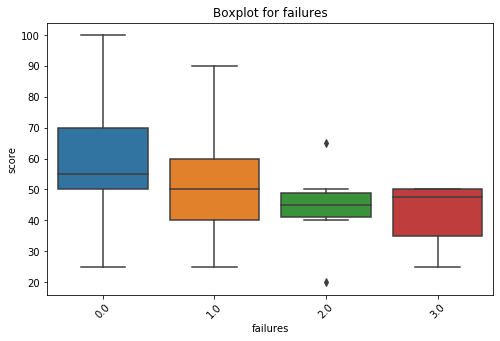

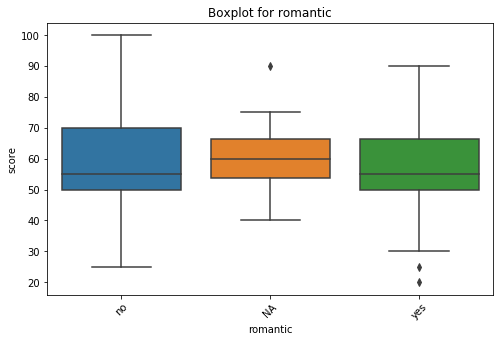

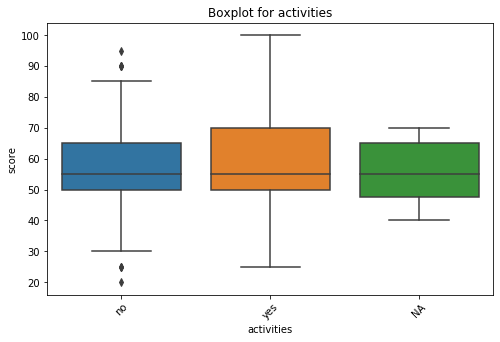

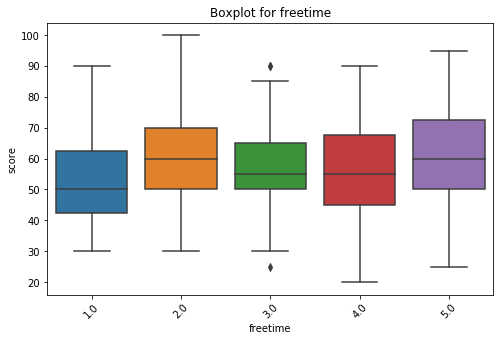

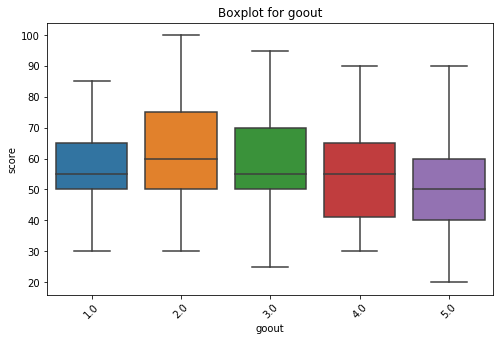

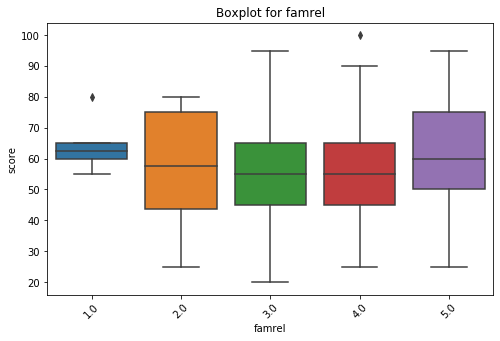

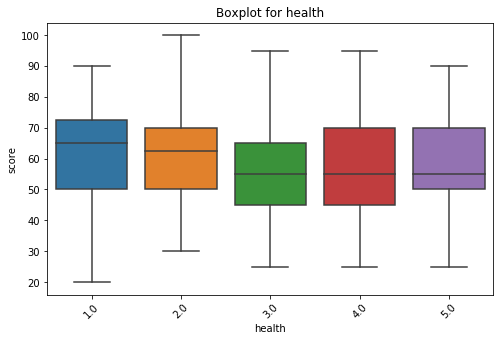

In [662]:
for col in ['failures', 'romantic', 'activities', 'freetime', 'goout', 'famrel', 'health']:
    get_boxplot(col)

Проверим, есть ли статистическая зависимость с помощью теста Стьюдента:

In [712]:
for col in ['failures', 'romantic', 'activities', 'freetime', 'goout', 'famrel', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


# 6.  **Выводы:**


Для нашей модели статистически значимыми были признаны следующие переменные:

 - sex
 - address - ученики которые проживают за городом хуже справляются с экзаменом
 - Mjob - специальность матери влияет на итоговую оценку
 - studytime - чем дольше время учебы вне школы, тем выше оценка
 - failures - чем больше внеучебных неудач у ученика, тем ниже оценка
 - goout - чем более высок показатель того как много ученик проводит времени с друзьями, тем ниже оценка
 
Не сомтря на то что тест Стьюдента выявил зависимость для переменной schoolsup, мы не будем включать ее в модель, т.к. она противоречит логике - ученики, которые не получали школьной поддержки, лучше написали экзамен.
 
Также из матрицы корреляций, мы увидели что следующий количественные переменные также коррелируют с параметром оценки;

 - absences - чем больше ученик пропустил уроков, тем ниже оценка
 - age - чем меньше возраст ученика, тем выше оценка (гипотеза: чем старше группа обучения, тем более вероятность повторения экзамена,если этот один и тот же экзамен, и более сильное отличие между учебными программами, чем для младших классов, если это разные экзамены)
 

In [714]:
stud_for_model = stud.loc[:, ['sex', 'address', 'Mjob', 'studytime', 'failures', 'goout', 'absences', 'age']]
stud_for_model.head()

,sex,address,Mjob,studytime,failures,goout,absences,age
0,F,U,at_home,2.0,0.0,4.0,6.0,18
1,F,U,at_home,2.0,0.0,3.0,4.0,17
2,F,U,at_home,2.0,3.0,2.0,10.0,15
3,F,U,health,3.0,0.0,2.0,2.0,15
4,F,U,other,2.0,0.0,2.0,4.0,16


Итак, в результате EDA для анализа влияния параметров ученика на его итоговую оценку за экзамен по математике были получены следующие выводы:

- В данных достаточно мало пустых значений, только столбцы Pstatus и paid имеют >10% пропусков.
- Была обнаружена колонка studytime, granular не заявленная в датасете. Из-за того что информация в ней не соответствовала условиям заданным в переменной studytime, мы исключили этот параметр.
- Незначительныве выбросы найдены в столбцах: score, age, absences, Fedu, famrel, что позволяет сделать вывод о том, что данные достаточно чистые.
- Мы выявили зависимость итоговой оценки от следующих параметров: sex, address, Mjob, studytime, failures, goout, absences, age.